Using PCA and LDA model
Fitting 5 folds for each of 36 candidates, totalling 180 fits
knn accuracy 0.9333333333333333
Fitting 5 folds for each of 8 candidates, totalling 40 fits
svm accuracy 0.9133333333333333


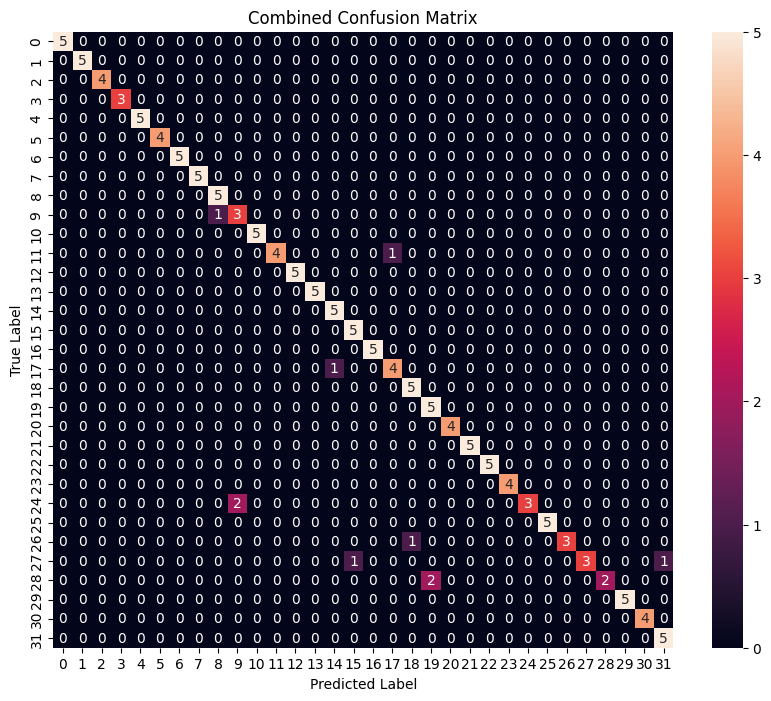

Combined Model Validation Accuracy: 0.9333333333333333


In [177]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.activations import relu, sigmoid, tanh, elu

resolution = 60
variance = 97
data_dir = f'dimension_reduced_data_{resolution}_res_{variance}_var'


# Load data
if use_pca and not use_lda:
    print('Using PCA model')
    X_train = np.load(f'{data_dir}/X_train_pca.npy')
    X_val = np.load(f'{data_dir}/X_val_pca.npy')
elif use_lda and not use_pca:
    print('Using LDA model')
    X_train = np.load(f'{data_dir}/X_train_lda.npy')
    X_val = np.load(f'{data_dir}/X_val_lda.npy')
elif use_pca and use_lda:
    print('Using PCA and LDA model')
    X_train = np.load(f'{data_dir}/X_train_pca_lda.npy')
    X_val = np.load(f'{data_dir}/X_val_pca_lda.npy')

y_train = np.load(f'{data_dir}/y_train.npy')
y_val = np.load(f'{data_dir}/y_val.npy')




#KNN
param_grid = {
    'n_neighbors': [4,5,6,7,8,10,12,14,16],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1)
knn.fit(X_train, y_train)
yp_val_knn = knn.predict(X_val)


print('knn accuracy',accuracy_score(y_val, yp_val_knn))







# SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf']
}

svm = SVC(probability=True, random_state=42)
svm_grid_tuned = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', verbose=1)
# svm_1 = SVC(kernel='rbf', C=1, gamma='scale', probability=True, random_state=42)
# svm_2 = SVC(kernel='rbf', C=10, gamma='scale', probability=True, random_state=42)
# svm_3 = SVC(kernel='rbf', C=100, gamma='scale', probability=True, random_state=42)

svm_grid_tuned.fit(X_train, y_train)
# svm_1.fit(X_train, y_train)
# svm_2.fit(X_train, y_train)
# svm_3.fit(X_train, y_train)

yp_val_tuned = svm_grid_tuned.predict(X_val)
# yp_val_1 = svm_1.predict(X_val)
# yp_val_2 = svm_2.predict(X_val)
# yp_val_3 = svm_3.predict(X_val)

yp_val_svm_ensemble = np.array([np.argmax(np.bincount([yp_val_tuned[i]])) for i in range(len(yp_val_1))])


print('svm accuracy',accuracy_score(y_val, yp_val_tuned))





# # Neural Network
# learning_rates = [0.01, 0.001]
# dropout_rates = [0.5, 0.6]
# best_acc = 0
# best_params = {}

# lb = LabelBinarizer()
# y_train_nn = lb.fit_transform(y_train)
# y_val_nn = lb.transform(y_val)

# activation_functions = [relu, sigmoid, tanh, elu]


# for lr in learning_rates:
#     for dr in dropout_rates:
#         for activation in activation_functions:
#             model = Sequential([
#                 Dense(256, input_shape=(X_train.shape[1],), activation=activation),
#                 Dropout(dr),
#                 Dense(128, activation=activation),
#                 Dropout(dr),
#                 Dense(y_train_nn.shape[1], activation='softmax')  # Usually softmax for the output layer
#             ])

#             model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=lr), metrics=['accuracy'])
#             model.fit(X_train, y_train_nn, epochs=50, batch_size=32, validation_data=(X_val, y_val_nn), verbose=0)
            
#             yp_val_nn = model.predict(X_val)
#             yp_val_nn = np.argmax(yp_val_nn, axis=1)
#             val_acc = accuracy_score(y_val, yp_val_nn)
            
#             if val_acc > best_acc:
#                 best_acc = val_acc
#                 best_params = {
#                     'learning_rate': lr,
#                     'dropout_rate': dr,
#                     'activation': activation.__name__  # Store the name of the activation function
#                 }


# # Retrain with best parameters
# best_model = Sequential([
#     Dense(256, input_shape=(X_train.shape[1],), activation=best_params['activation']),
#     Dropout(best_params['dropout_rate']),
#     Dense(128, activation=best_params['activation']),
#     Dropout(best_params['dropout_rate']),
#     Dense(y_train_nn.shape[1], activation='softmax')
# ])

# best_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=best_params['learning_rate']), metrics=['accuracy'])
# best_model.fit(X_train, y_train_nn, epochs=50, batch_size=32, validation_data=(X_val, y_val_nn))

# yp_val_nn_best = best_model.predict(X_val)
# yp_val_nn_best = np.argmax(yp_val_nn_best, axis=1)

# # model = Sequential([
# #     Dense(256, input_shape=(X_train.shape[1],), activation='relu'),
# #     Dropout(0.5),
# #     Dense(128, activation='relu'),
# #     Dropout(0.5),
# #     Dense(y_train_nn.shape[1], activation='softmax')
# # ])

# # model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
# # model.fit(X_train, y_train_nn, epochs=50, batch_size=32, validation_data=(X_val, y_val_nn))

# # yp_val_nn = model.predict(X_val)
# # yp_val_nn = np.argmax(yp_val_nn, axis=1)








# Combining Predictions
yp_val_combined = np.array([
    np.argmax(np.bincount([yp_val_tuned[i], yp_val_knn[i]])) 
    for i in range(len(yp_val_tuned))
])

# Evaluation
validation_accuracy_combined = accuracy_score(y_val, yp_val_combined)
cm_combined = confusion_matrix(y_val, yp_val_combined)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_combined, annot=True, fmt="d")
plt.title("Combined Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

print(f"Combined Model Validation Accuracy: {validation_accuracy_combined}")


In [178]:
print(svm_grid_tuned.best_params_)
print(knn.best_params_)
print(best_params)
print(X_train.shape)

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
{'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
{'learning_rate': 0.01, 'dropout_rate': 0.5, 'activation': 'relu'}
(9377, 31)
